Assignment 2: Statistical Testing and A/B Testing

The objective of this document is to review the testing results of the two features change (Variant A and Variant B). The document has four parts:
1. Preliminary analysis on the results
2. Testing for statistically significant difference between features and variant
3. Recommendation on which feature to deploy
4. Roll-out plan of the feature

Part 1: Preliminary analysis on the results

First, we review the dataset to ensure the data is cleaned. There are no missing or duplicate values in the dataset. The distribution of CTR shows that there are certain outliers which may affect the sample mean. (See Graph1 and Graph2 for details) Hence, we've removed the outliers based on the lower bound of 25 percentile - 1.5 times of interquartile range. 6 records are removed from the dataset which is not material.

Then, we review the customer profiles of the three different groups (i.e., control, variant A and variant B) to ensure they're having similar features.  Please refer to Graph3, Graph4 and Graph5 for details. The three group have comparable age range with distributed samples from the three locations and three devices. Hence, we conclude that they are having similar customer profiles.

Lastly, we review the boxplot on time spent and CTR, which are the two target variables we interested in. Please see Graph6 and Graph7 for details. To ensure consistent results across locations and devices, we have also plotted the boxplot on time spent and CTR by variant and by Locations and Devices in Graph 8.1 to 8.6 and Graph 9.1 to 9.6. All the graphs indicate that Variant A results in a higher mean in Time Spent and CTR regardless of the locations and devices.

In conclusion, Variant A has a higher mean than both control group and Variant B under both target variables. This indicate that implementing the feature change under Variant A will lift both the average time spent and CTR of our mobile application. This will be reconfirmed in the statistical testing in next part. 

Part 2: Summary on Testing for statistically significant difference between features and variant

Based on Graph1 and Graph2, both the average time spent and CTR are normally distributed. The data points are collected independently. The variances of the three group are similar (24.6 to 27.5 for Time Spent and 0.00038 to 0.00043 for CTR). Thus, we can apply t-tests to for any significant difference based on the three combinations (Control vs Variant A; Control vs Variant B; Variant A vs Variant B). All the testing results have p-value < 0.05, which indicate that both the mean value of average time spent and CTR of the three groups have statistically significant difference. We have also performed AVONA test on the three groups and the result is consistent.

Based on the above, we conclude that the mean value of the time spent and CTR are statistically significant different. This indicate that both Variant A and Variant B would result in a higher time spent and CTR, of which Variant A generates a higher lift.

Part 3: Recommendation on which feature to deploy

Based on above preliminary analysis and statistical testing, we recommend the engineering team to deploy the feature change under Variant A provided that the implementation costs of Variant A and Variant B are comparable.

Graph10 and Graph11 show that Variant A (i.e. green line) is consistently higher than the other two groups. On average, Variant A will increase average spent by 4.7 comparing against the control group (~24% increase) and increase CTR by 0.2 (~21% increase). Despite Variant B also result in a lift, statistical testing shows that Variant A is statistically different from Variant B. Variant B on average is 6% and 9% lower than Variant A on average time spent and CTR respectively. Hence, Variant A is recommended given its higher lift on average.

Part 4: Roll-out plan of the feature

Based on the testing results, we propose to rollout the Variant A features change on phased approach by locations. The roll-out to the first location will be in four weeks time based on the draft schedule below. Given the large volume of mobile application users and avaiability of alternative applications in app store, any failure in roll-out will have direct impact on the customer satisfaction, lower the reputation, and reduce usage of our mobile application. Thus, a phased approach by location is proposed to mitigate the implementation risk of the key feature change.

The roll-out schedule is drafted as below:

1. Identify any bug fix required based on the two-week experience from the experiment (Duration: 5-day).
2. Obtain internal management approval for the key feature change with a phased approach by location (Duration: 1-day).
3. Perform functionality testing and user acceptance testing on the feature change (Duration: 10-day).
4. Prepare a summary of the change update and frequently ask question for loading to the app store / website (Duration: 2-day).
5. Prepare the contingency / roll-back plan in case any unexpected incident after rollout (Duration: 2-day).
6. Roll-out to the first location after approval and monitor for one week on the time spent and CTR. (5-day)
7. If no unexpected incident happened, repeat step 4 until all the locations being covered.
8. Obtain customer feedback on the key feature change and analyze for future enhancement. (ongoing)

In [193]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

In [194]:
# import the dataset

df = pd.read_csv(r"C:\Users\samue\OneDrive\Desktop\MBAN6110S_Data science\experiment_dataset.csv")

In [195]:
# preliminary view of the dataset
df.head()

,Unnamed: 0,Age,Location,Device,Variant,Time Spent,CTR
0,0,62,Location2,Device2,Control,13.928669,0.084776
1,1,18,Location1,Device1,Variant B,11.310518,0.096859
2,2,21,Location2,Device1,Variant B,24.842100,0.097630
3,3,21,Location1,Device3,Variant B,20.061300,0.109783
4,4,57,Location1,Device2,Variant B,34.495503,0.068579


In [196]:
# to check any missing value and incorrect data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1000 non-null   int64  
 1   Age         1000 non-null   int64  
 2   Location    1000 non-null   object 
 3   Device      1000 non-null   object 
 4   Variant     1000 non-null   object 
 5   Time Spent  1000 non-null   float64
 6   CTR         1000 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 54.8+ KB


In [197]:
df.describe()

,Unnamed: 0,Age,Time Spent,CTR
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,40.715000,22.713345,0.109145
std,288.819436,13.655557,5.479292,0.022366
min,0.000000,18.000000,7.114806,0.012975
25%,249.750000,28.000000,19.216608,0.094286
50%,499.500000,41.000000,22.506707,0.108944
75%,749.250000,53.000000,26.255950,0.124238
max,999.000000,64.000000,39.395770,0.172728


Text(0.5, 1.0, 'Graph1: Distribution of time spent')

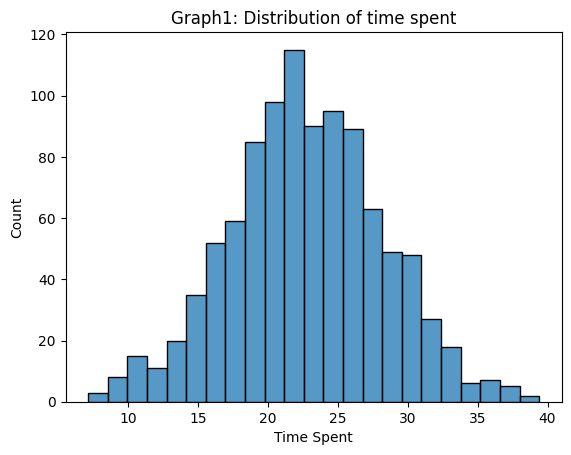

In [198]:
# To check the distribution of the target variable
sns.histplot(data=df, x='Time Spent')
plt.title("Graph1: Distribution of time spent")

Text(0.5, 1.0, 'Graph2: Distribution of CTR')

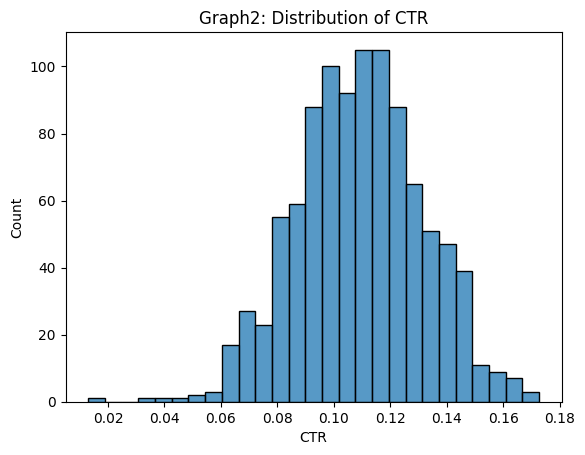

In [199]:
sns.histplot(data=df, x='CTR')
plt.title("Graph2: Distribution of CTR")

In [200]:
# handle the outlier on the CTR
upper = df['CTR'].quantile(0.75) + 1.5 * (df['CTR'].quantile(0.75) - df['CTR'].quantile(0.25))
lower = df['CTR'].quantile(0.25) - 1.5 * (df['CTR'].quantile(0.75) - df['CTR'].quantile(0.25))

df.drop(df[(df['CTR'] < lower) | (df['CTR'] > upper)].index, inplace=True)
df.describe()

,Unnamed: 0,Age,Time Spent,CTR
count,994.00000,994.000000,994.000000,994.000000
mean,499.84507,40.711268,22.736919,0.109441
std,288.49527,13.652799,5.469715,0.021736
min,0.00000,18.000000,7.206894,0.053209
25%,250.25000,28.250000,19.224189,0.094606
50%,500.50000,41.000000,22.563726,0.109102
75%,748.75000,53.000000,26.315254,0.124266
max,999.00000,64.000000,39.395770,0.168363


In [201]:
# check for any duplicated entries
df.duplicated().any()

False

Text(0.5, 1.0, 'Graph3: Boxplot of Age by variant')

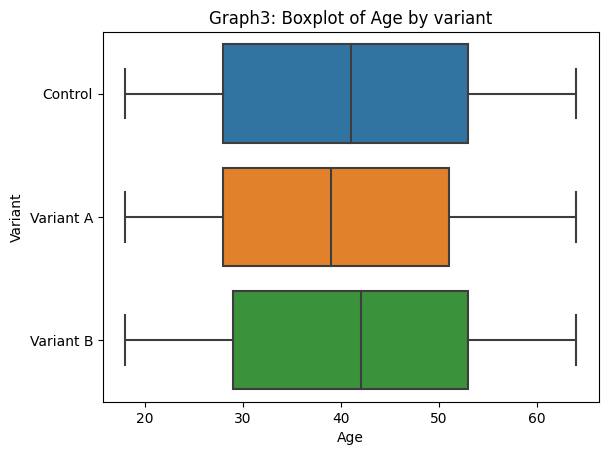

In [202]:
# Look at the age by Variant to ensure similar customer profile for comparison purpose

sns.boxplot(data=df, x = "Age", y="Variant", order=['Control','Variant A','Variant B'])
plt.title("Graph3: Boxplot of Age by variant")

Text(0.5, 1.0, 'Graph4: Histogram of Location by variant')

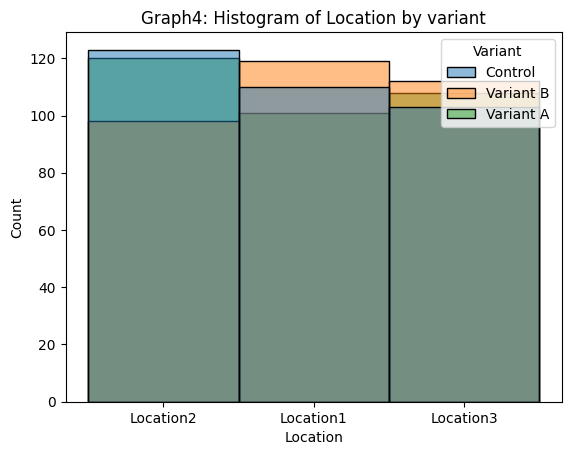

In [203]:
# Look at the location split to ensure similar customer profile for comparison purpose

sns.histplot(data=df, x = "Location", hue="Variant")
plt.title("Graph4: Histogram of Location by variant")

Text(0.5, 1.0, 'Graph5: Histogram of Device by variant')

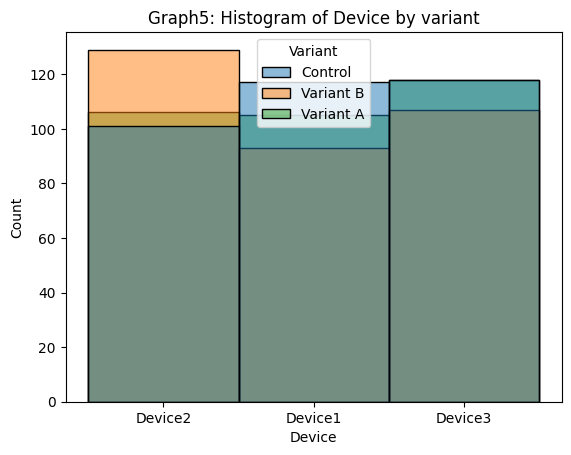

In [204]:
# Look at the device split to ensure similar customer profile for comparison purpose

sns.histplot(data=df, x = "Device", hue="Variant")
plt.title("Graph5: Histogram of Device by variant")

Text(0.5, 1.0, 'Graph6: Boxplot of Time Spent by variant')

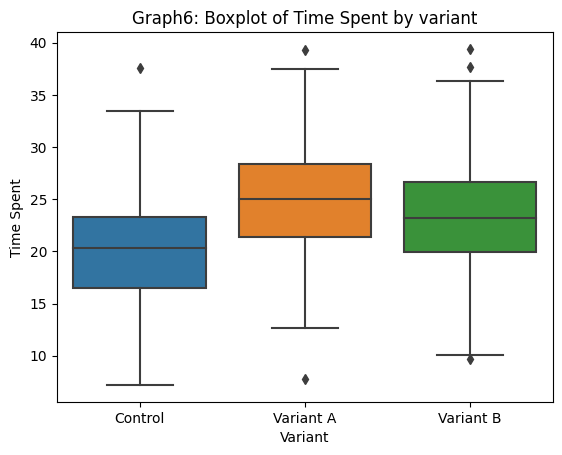

In [205]:
# Compare the boxplot of the three groups and identify the Group with most significant uplift
sns.boxplot(data=df, y='Time Spent', x='Variant', order=['Control','Variant A','Variant B'])
plt.title("Graph6: Boxplot of Time Spent by variant")

Text(0.5, 1.0, 'Graph7: Boxplot of CTR by variant')

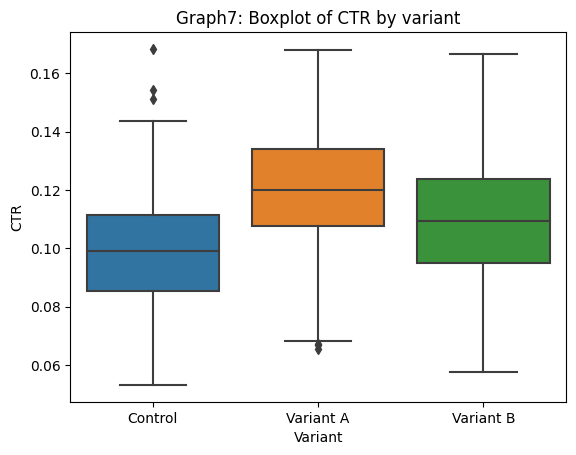

In [206]:
sns.boxplot(data=df, y='CTR', x='Variant', order=['Control','Variant A','Variant B'])
plt.title("Graph7: Boxplot of CTR by variant")

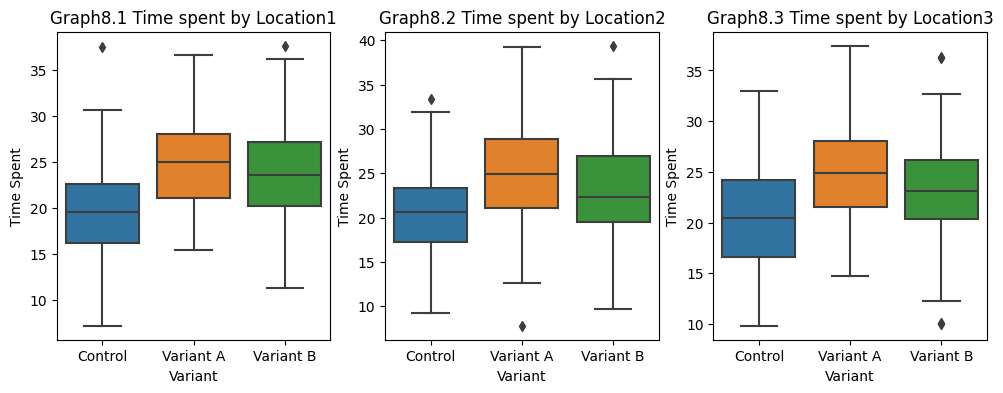

In [207]:
# Look at the variant by location to see if the time spent increase is across the locations
x=0
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
for i in np.sort(np.unique(df['Location'])):
    sns.boxplot(data=df[df['Location']== i], y='Time Spent', x='Variant', order=['Control','Variant A','Variant B'], ax=axes[x])
    x += 1
y=1
for i in axes:
    i.set_title(f"Graph8.{y} Time spent by {np.sort(np.unique(df['Location']))[y-1]}")
    y += 1

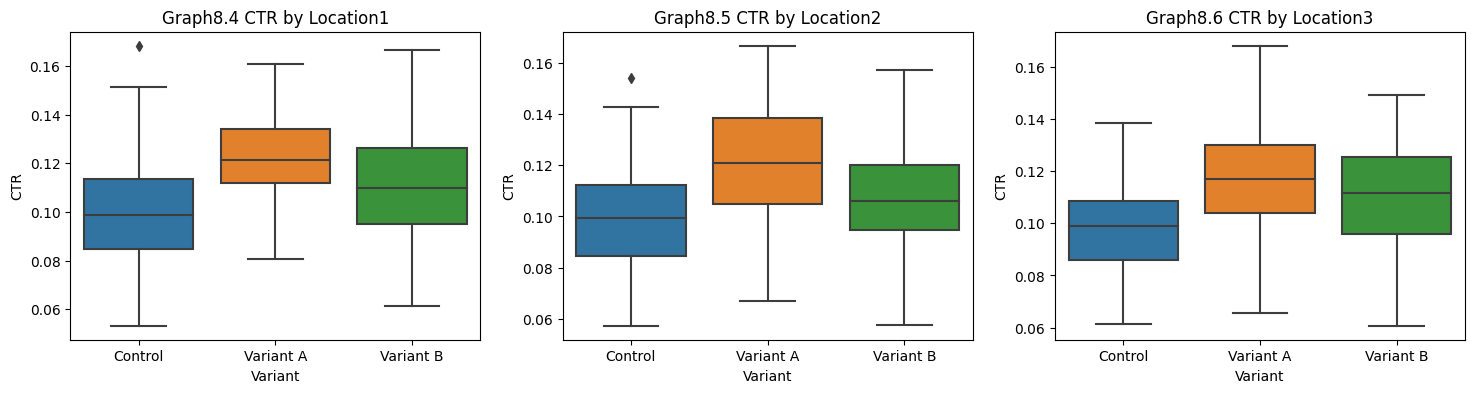

In [208]:
# Look at the variant by location to see if the CTR increase is across the locations
x=0
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 4))
for i in np.sort(np.unique(df['Location'])):
    sns.boxplot(data=df[df['Location']== i], y='CTR', x='Variant', order=['Control','Variant A','Variant B'], ax=axes[x])
    x += 1
y=1
for i in axes:
    i.set_title(f"Graph8.{y+3} CTR by {np.sort(np.unique(df['Location']))[y-1]}")
    y += 1

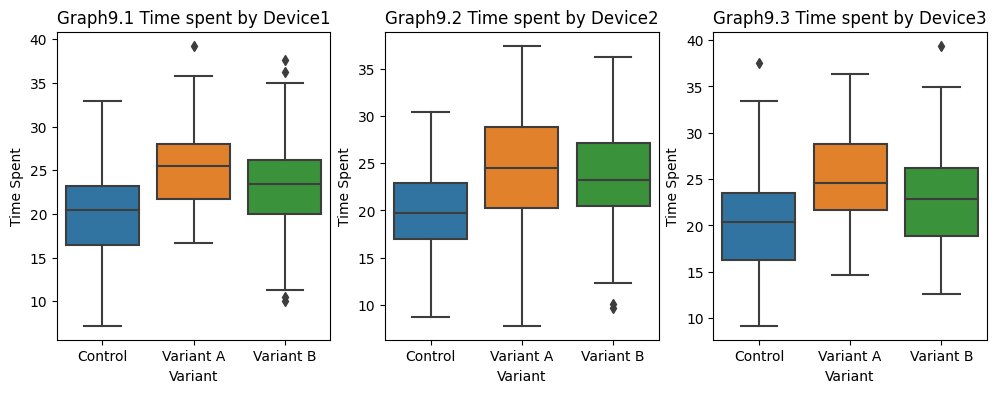

In [209]:
# Look at the variant by device to see if the time spent increase is across the device
x=0
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
for i in np.sort(np.unique(df['Device'])):
    sns.boxplot(data=df[df['Device']== i], y='Time Spent', x='Variant', order=['Control','Variant A','Variant B'], ax=axes[x])
    x += 1
y=1
for i in axes:
    i.set_title(f"Graph9.{y} Time spent by {np.sort(np.unique(df['Device']))[y-1]}")
    y += 1

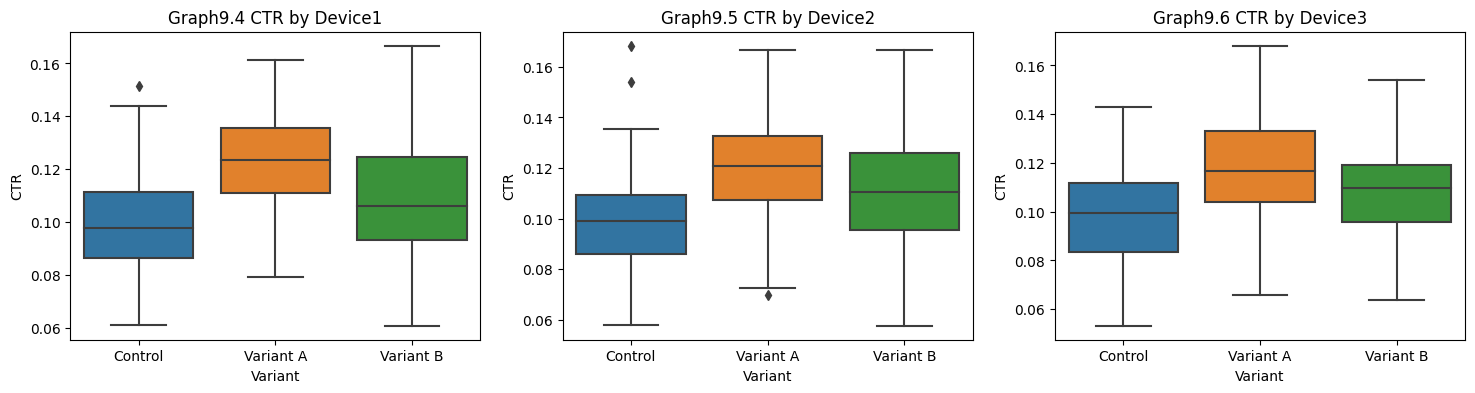

In [210]:
# Look at the variant by location to see if the increase is across the device
x=0
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 4))
for i in np.sort(np.unique(df['Device'])):
    sns.boxplot(data=df[df['Device']== i], y='CTR', x='Variant', order=['Control','Variant A','Variant B'], ax=axes[x])
    x += 1
y=1
for i in axes:
    i.set_title(f"Graph9.{y+3} CTR by {np.sort(np.unique(df['Device']))[y-1]}")
    y += 1

In [212]:
# Check whether the three groups are having the same variance for applying parametric testing

for i in np.unique(df['Variant']):
    print(f"Time Spent Variance of {i}: {df[df['Variant'] == i]['Time Spent'].var()}")

print('')
for i in np.unique(df['Variant']):
    print(f"CTR Variance of {i}: {df[df['Variant'] == i]['CTR'].var()}")

Time Spent Variance of Control: 25.973640666843636
Time Spent Variance of Variant A: 24.607413304115536
Time Spent Variance of Variant B: 27.502271065698352

CTR Variance of Control: 0.00037735022341909294
CTR Variance of Variant A: 0.00039718662570768223
CTR Variance of Variant B: 0.00042789572545994285


In [213]:
# define the test variable for time spent and CTR

time_ctrl = df[df['Variant'] == 'Control']['Time Spent']
time_varA = df[df['Variant'] == 'Variant A']['Time Spent']
time_varB = df[df['Variant'] == 'Variant B']['Time Spent']

ctr_ctrl = df[df['Variant'] == 'Control']['CTR']
ctr_varA = df[df['Variant'] == 'Variant A']['CTR']
ctr_varB = df[df['Variant'] == 'Variant B']['CTR']


In [214]:
# perform t-test for any significant difference on time spent between control group and variant A

t_stat, p_val = stats.ttest_ind(time_ctrl, time_varA)
print(f"T-statistic_timespent: {t_stat}")
print(f"P-value_timespent: {p_val}")

t_stat, p_val = stats.ttest_ind(ctr_ctrl, ctr_varA)
print(f"T-statistic_ctr: {t_stat}")
print(f"P-value_ctr: {p_val}")

T-statistic_timespent: -12.138731412116599
P-value_timespent: 9.231249465932202e-31
T-statistic_ctr: -13.641515877000538
P-value_ctr: 1.5912924080120043e-37


In [215]:
# perform t-test for any significant difference on time spent between control group and variant B

t_stat, p_val = stats.ttest_ind(time_ctrl, time_varB)
print(f"T-statistic_timespent: {t_stat}")
print(f"P-value_timespent: {p_val}")

t_stat, p_val = stats.ttest_ind(ctr_ctrl, ctr_varB)
print(f"T-statistic_ctr: {t_stat}")
print(f"P-value_ctr: {p_val}")

T-statistic_timespent: -8.144782903607865
P-value_timespent: 1.8889908863478026e-15
T-statistic_ctr: -6.329256266253539
P-value_ctr: 4.537507607649505e-10


In [216]:
# perform t-test for any significant difference on time spent between variant A and variant B

t_stat, p_val = stats.ttest_ind(time_varA, time_varB)
print(f"T-statistic_timespent: {t_stat}")
print(f"P-value_timespent: {p_val}")

t_stat, p_val = stats.ttest_ind(ctr_varA, ctr_varB)
print(f"T-statistic_ctr: {t_stat}")
print(f"P-value_ctr: {p_val}")

T-statistic_timespent: 3.692068173572655
P-value_timespent: 0.00024093856540617804
T-statistic_ctr: 6.9282708319015
P-value_ctr: 1.0193584291039138e-11


Text(0.5, 1.0, 'Graph10: Scatterplot of time spent vs age by variants')

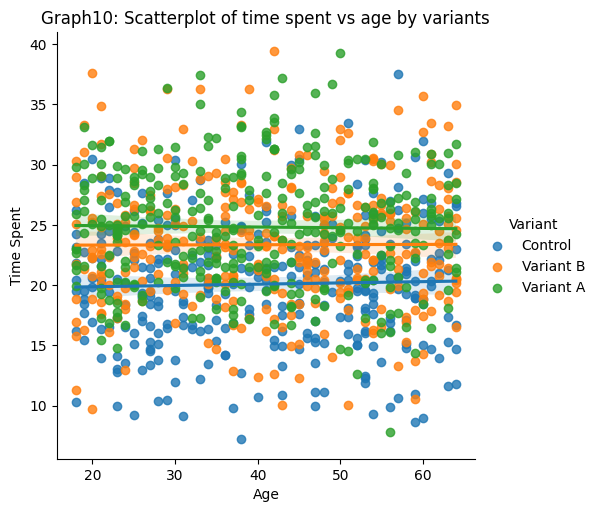

In [217]:
# line plot to look at the relationship between age and time spent by Variants

sns.lmplot(data = df, x='Age', y='Time Spent', hue='Variant')
plt.title('Graph10: Scatterplot of time spent vs age by variants')

Text(0.5, 1.0, 'Graph11: Scatterplot of CTR vs age by variants')

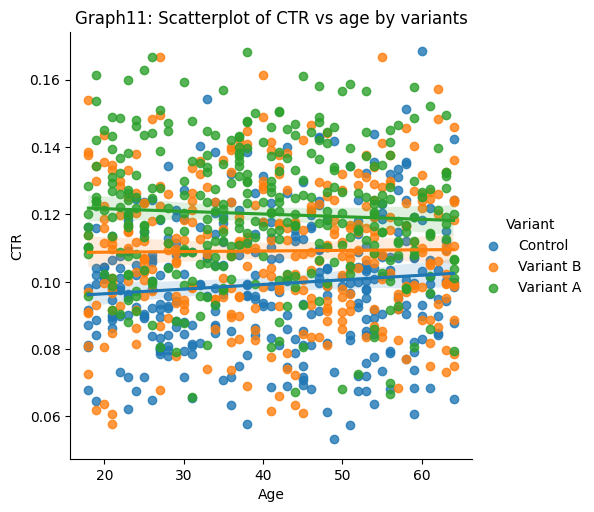

In [218]:
# line plot to look at the relationship between age and CTR by Variants

sns.lmplot(data = df, x='Age', y='CTR', hue='Variant')
plt.title('Graph11: Scatterplot of CTR vs age by variants')

In [219]:
# perform AVONA test to see if there is significant difference between the three groups

f_stat, p_val = stats.f_oneway(time_ctrl, time_varA, time_varB)

print(f"F-statistic_timespent: {f_stat}")
print(f"P-value_timespent: {p_val}")

f_stat, p_val = stats.f_oneway(ctr_ctrl, ctr_varA, ctr_varB)

print(f"F-statistic_ctr: {f_stat}")
print(f"P-value_ctr: {p_val}")

F-statistic_timespent: 75.2132709220305
P-value_timespent: 3.8817549121559877e-31
F-statistic_ctr: 89.9708872514619
P-value_ctr: 1.2452443144353822e-36


In [220]:
# calculating the mean time spent and percentage increase by variant

mean_time = df.groupby('Variant')['Time Spent'].mean().to_frame()
mean_time['Change'] = mean_time.pct_change()
print(mean_time)

           Time Spent    Change
Variant                        
Control     20.088553       NaN
Variant A   24.823961  0.235727
Variant B   23.354592 -0.059192


In [221]:
# calculating the mean CTR and percentage increase by variant

mean_ctr = df.groupby('Variant')['CTR'].mean().to_frame()
mean_ctr['Change'] = mean_ctr.pct_change()
print(mean_ctr)


                CTR    Change
Variant                      
Control    0.099291       NaN
Variant A  0.120110  0.209673
Variant B  0.109138 -0.091347
